# Gaussians Arithmetic

This is a presentation for Computer Science Club having to do with Kalman filters.  This notebook has to do with showing that two critical aspects of arithmetic on Gaussian distributions, addition and multiplication, work as expected with sampled distributions.

## Basic Gaussian Generation And Plotting 

These are just two classes that wrap numpy's `np.random.normal` and matploblib's `hist` methods to make things easier.

In [141]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Plot:
    def __init__(self, range=(-20,20)):
        self.range = range 
    
    def hist(self, data, color):
        plt.hist(data, 200, range=self.range, normed=True, facecolor=color, alpha=0.2, histtype='stepfilled')
        
    def plot(self, x, y, color, alpha):
        plt.plot(x, y, color=color, alpha=alpha)

    def show(self):
        plt.show() 
        
        
class Gaussian:
    def samples(self, params, samples=2000):
        return [np.random.normal(params[0], params[1]) for x in range(samples)]
            
    def plot_samples(self, plot, params, color='green'):
        plot.hist(self.samples(params), color)
        
    def gaussian(self, x, mean, std):
        return np.exp(-1.0 * np.power((x - mean) / std, 2.0) / 2.0) / (math.sqrt(2.0 * math.pi) * std)
    
    def make_support(self, plot, scale=100.0):
        return [x / scale for x in range(int(scale * plot.range[0]), int(scale * plot.range[1]))]
        
    def plot_pdf(self, plot, params, color='green', alpha=1.0):
        support = self.make_support(plot)
        result = [self.gaussian(x, params[0], params[1]) for x in support]
        plot.plot(support, result, color, alpha)
     

### Plotting A Single Gaussian

Easy to plot a single distribution.

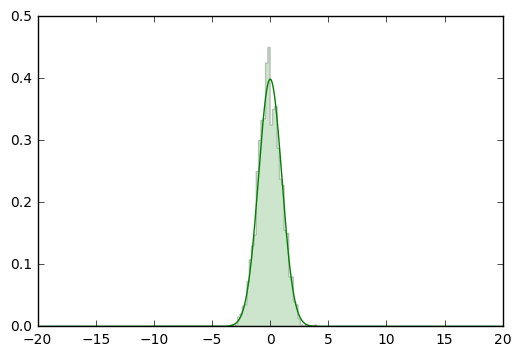

In [142]:
dist = (0.0, 1.0)

p = Plot()
    
g = Gaussian()
g.plot_samples(p, dist)
g.plot_pdf(p, dist)

p.show() 

### Plotting Multiple Gaussians

Easy enough to plot a couple distributions on the same plot in different colors.  We will be using these two distributions in the following calculations.

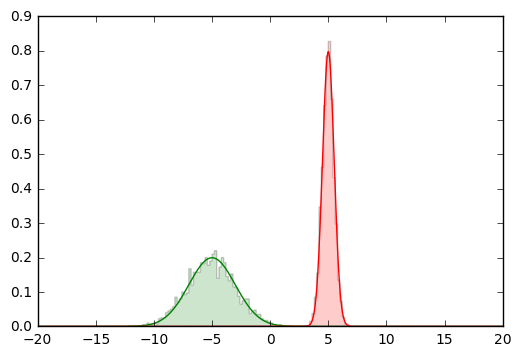

In [143]:
dist1 = (-5.0, 2.0)
dist2 = (5, 0.5)

p = Plot()
    
g1 = Gaussian()
g1.plot_samples(p, dist1)
g1.plot_pdf(p, dist1)

g2 = Gaussian()
g2.plot_samples(p, dist2, 'red')
g2.plot_pdf(p, dist2, 'red')

p.show() 

## Computing With Gaussian Distributions

Here we are validating that for IID Gaussians that the sum and product behave as expected.

In [122]:
class Compute:
    def add(self, dist1, dist2):
        mean = dist1[0] + dist2[0]
        std = dist1[1] + dist2[1]
        self.dist = (mean, std)
        
    def multiply(self, dist1, dist2):
        mean = (dist1[0] * dist2[1] + dist1[1] * dist2[0]) / (dist1[1] + dist2[1])
        std = 1.0 / (1.0 / dist1[1] + 1.0 / dist2[1])
        self.dist = (mean, std)
   

### Addition

The prediction step in a Kalman filter is a sum of Gaussians.  For addition, the pointwise addition of the samples suffices.  The green distribution is from the computed mean and standard deviation, the red distribution is from manually adding the points of the two Gaussians being summed.  As you can see they overlap.

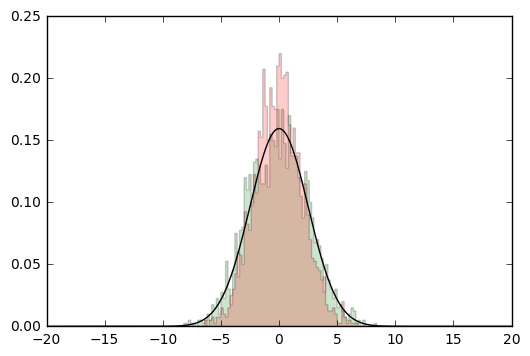

In [150]:
dist1 = (-5.0, 2.0)
dist2 = (5, 0.5)

p = Plot()

c = Compute()
c.add(dist1, dist2)

g1 = Gaussian()
g1.plot_samples(p, c.dist)
g1.plot_pdf(p, c.dist, 'black')

g1 = Gaussian()
s1 = g1.samples(dist1)
g2 = Gaussian()
s2 = g2.samples(dist2)

g_manual = [s1[i] + s2[i] for i in range(len(s1))]
p.hist(g_manual, 'red')               

p.show() 

### Multiplication

The measurement step in a Kalman filter is the product of Gaussians, related to the application of Bayes Theorem for the posterior and the measurement.  Please see [this link](docs/2003-003.pdf) and [this link](/docs/gaussid.pdf) for more information.  For this, we will simply plot the outline of the distribution rather than the sampled distribution to keep things simple.

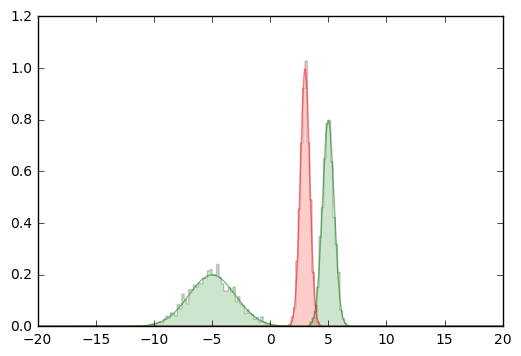

In [149]:
dist1 = (-5.0, 2.0)
dist2 = (5, 0.5)

p = Plot()

c = Compute()
c.multiply(dist1, dist2)

g = Gaussian()
g.plot_pdf(p, dist1, 'green', 0.5)
g.plot_samples(p, dist1, 'green')
g.plot_pdf(p, dist2, 'green', 0.5)
g.plot_samples(p, dist2, 'green')

g.plot_pdf(p, c.dist, 'red', 0.5)
g.plot_samples(p, c.dist, 'red')

p.show() 